# description 
This project aims to predict academic stress levels among students using real-world survey data. The target variable represents stress levels as ordinal categories (1 = lowest stress, 5 = highest stress). Our objective is to build and tune machine learning models that can accurately predict these stress levels, with a special focus on improving Quadratic Weighted Kappa (QWK), a metric well-suited to ordinal classification.

# data loading and understanding

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/kaggle/input/student-academic-stress-real-world-dataset/academicStress.csv')

In [2]:
print("Dataset Shape:", df.shape)


Dataset Shape: (121, 9)


In [3]:
print(df.columns.tolist())


['Timestamp', 'Your Academic Stage', 'Peer pressure', 'Academic pressure from your home', 'Study Environment', 'What coping strategy you use as a student?', 'Do you have any bad habits like smoking, drinking on a daily basis?', 'What would you rate the academic  competition in your student life', 'Rate your academic stress index ']


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            121 non-null    object
 1   Your Academic Stage                                                  121 non-null    object
 2   Peer pressure                                                        121 non-null    int64 
 3   Academic pressure from your home                                     121 non-null    int64 
 4   Study Environment                                                    121 non-null    object
 5   What coping strategy you use as a student?                           121 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  121 non-null    object
 7   What would you rat

In [5]:
df.head(10)

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5
5,24/07/2025 22:08:13,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,4
6,24/07/2025 22:09:21,undergraduate,5,5,disrupted,Emotional breakdown (crying a lot),No,4,4
7,24/07/2025 22:10:06,undergraduate,3,2,Peaceful,"Social support (friends, family)",No,3,3
8,24/07/2025 22:11:01,undergraduate,2,2,Peaceful,Analyze the situation and handle it with intel...,No,2,2
9,24/07/2025 22:11:19,undergraduate,2,2,Peaceful,Analyze the situation and handle it with intel...,No,4,2


In [6]:
print("Statistical Summary for Numeric Columns:")
df.describe()

Statistical Summary for Numeric Columns:


,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,121.000000,121.000000,121.000000,121.000000
mean,3.008264,3.190083,3.553719,3.669421
std,1.083942,1.260384,0.991215,1.059783
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [7]:
# For categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("Unique Values per Categorical Column:")
    for col in categorical_cols:
        print(f"{col}: {df[col].nunique()} unique values")

Unique Values per Categorical Column:
Timestamp: 121 unique values
Your Academic Stage: 3 unique values
Study Environment: 3 unique values
What coping strategy you use as a student?: 3 unique values
Do you have any bad habits like smoking, drinking on a daily basis?: 3 unique values


* Dataset size: 121 rows × 9 columns — small enough for EDA but enough variation for analysis.
* Balanced mix: 4 numeric columns (peer-pressure, academic-pressure-home, academic-competition, academic-stress-index) and 5 categorical columns.
* Peer Pressure: Mean ≈ 3.01, Std ≈ 1.08 — moderately spread, values range 1–5.
* Academic Pressure from Home: Mean ≈ 3.19 — slightly higher than peer pressure.
* Academic Competition Rating: Mean ≈ 3.55 — most students feel competition is above average.
* Academic Stress Index: Mean ≈ 3.67 — stress levels lean toward the higher side.
* Your Academic Stage: 3 unique values — likely undergraduate/postgraduate/other group.
* Study Environment: only 3 types (e.g., Peaceful, Noisy, Disrupted).
* Coping Strategy: 3 common strategies — possibly a focus area for mental health recommendations.
* Bad Habits: Yes/No/Other — could test correlation with stress index.
* Higher academic competition seems linked to higher stress index.
* Poorer study environment (Noisy/Disrupted) may raise stress.
* Coping strategy effectiveness could be analyzed by comparing average stress index.


In [8]:
# Rename columns
df.rename(columns={
    'Your Academic Stage': 'academic-stage',
    'Peer pressure': 'peer-pressure',
    'Academic pressure from your home': 'academic-pressure-home',
    'Study Environment': 'study-environment',
    'What coping strategy you use as a student?': 'coping-strategy',
    'Do you have any bad habits like smoking, drinking on a daily basis?': 'bad-habits',
    'What would you rate the academic  competition in your student life': 'academic-competition',
    'Rate your academic stress index ': 'academic-stress-index'
}, inplace=True)

print(df.columns)

Index(['Timestamp', 'academic-stage', 'peer-pressure',
       'academic-pressure-home', 'study-environment', 'coping-strategy',
       'bad-habits', 'academic-competition', 'academic-stress-index'],
      dtype='object')


# Eda and cleaning

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Droped timestamp
df = df.drop(columns=["Timestamp"])

# -----------------
# 1. Univariate Analysis
# -----------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)
print(numeric_cols)

Index(['academic-stage', 'study-environment', 'coping-strategy', 'bad-habits'], dtype='object')
Index(['peer-pressure', 'academic-pressure-home', 'academic-competition',
       'academic-stress-index'],
      dtype='object')


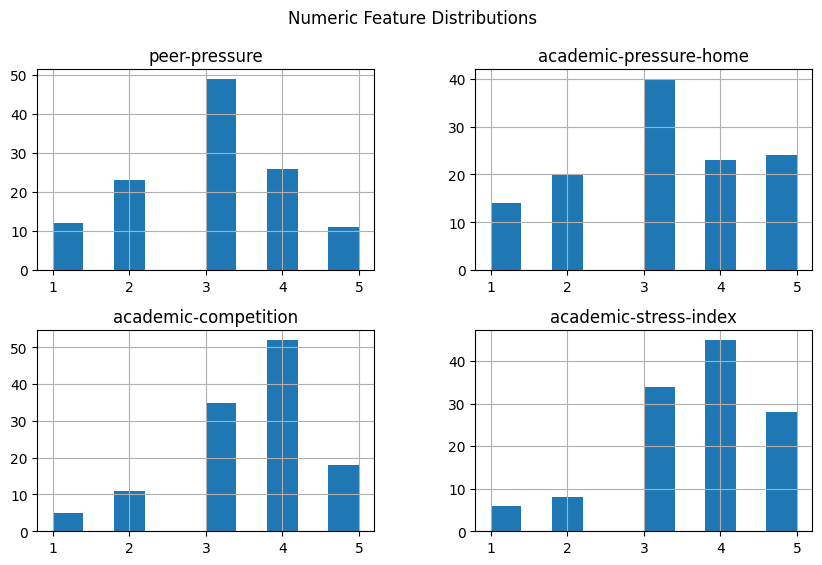

In [10]:
df[numeric_cols].hist(bins=10, figsize=(10, 6))
plt.suptitle("Numeric Feature Distributions")
plt.show()

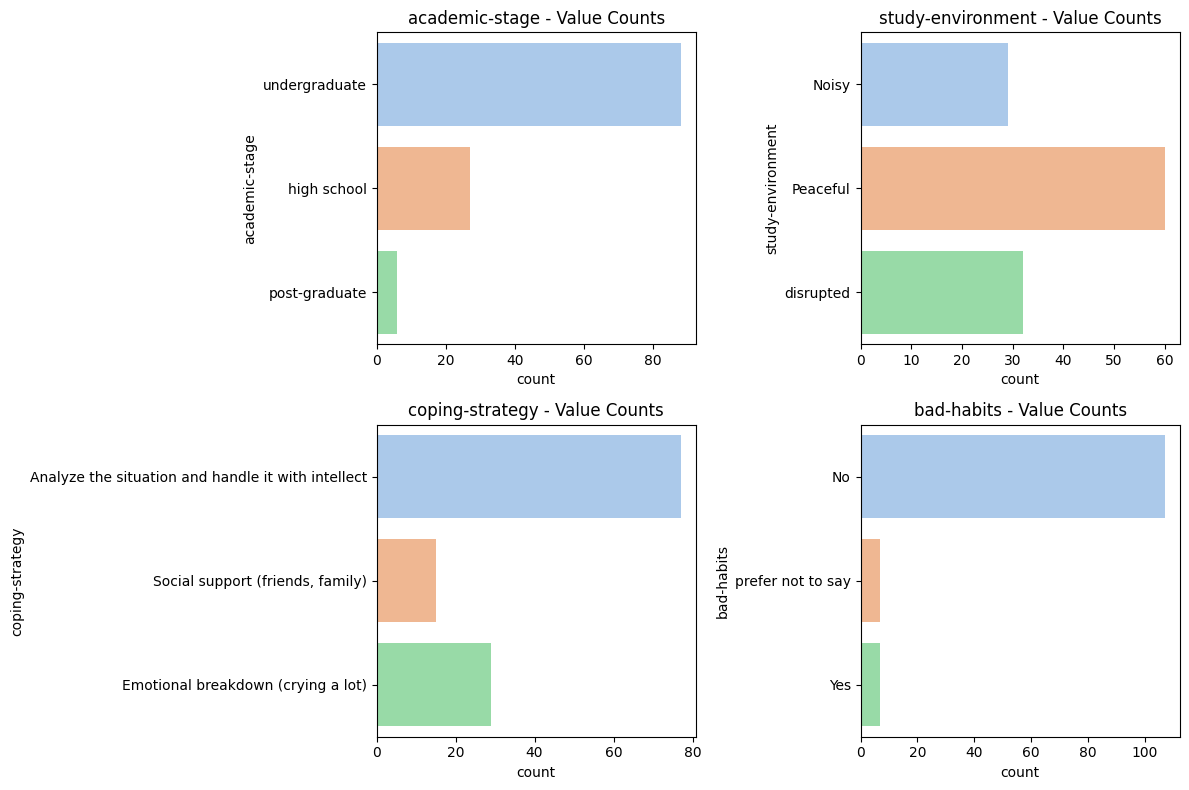

In [11]:
# -----------------
# 2. Categorical Value Counts
# -----------------
rows = (len(categorical_cols) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(12, 4*rows))
axes = axes.flatten()
for ax, col in zip(axes, categorical_cols):
    sns.countplot(y=col, data=df, ax=ax, palette="pastel")
    ax.set_title(f"{col} - Value Counts")
plt.tight_layout()
plt.show()

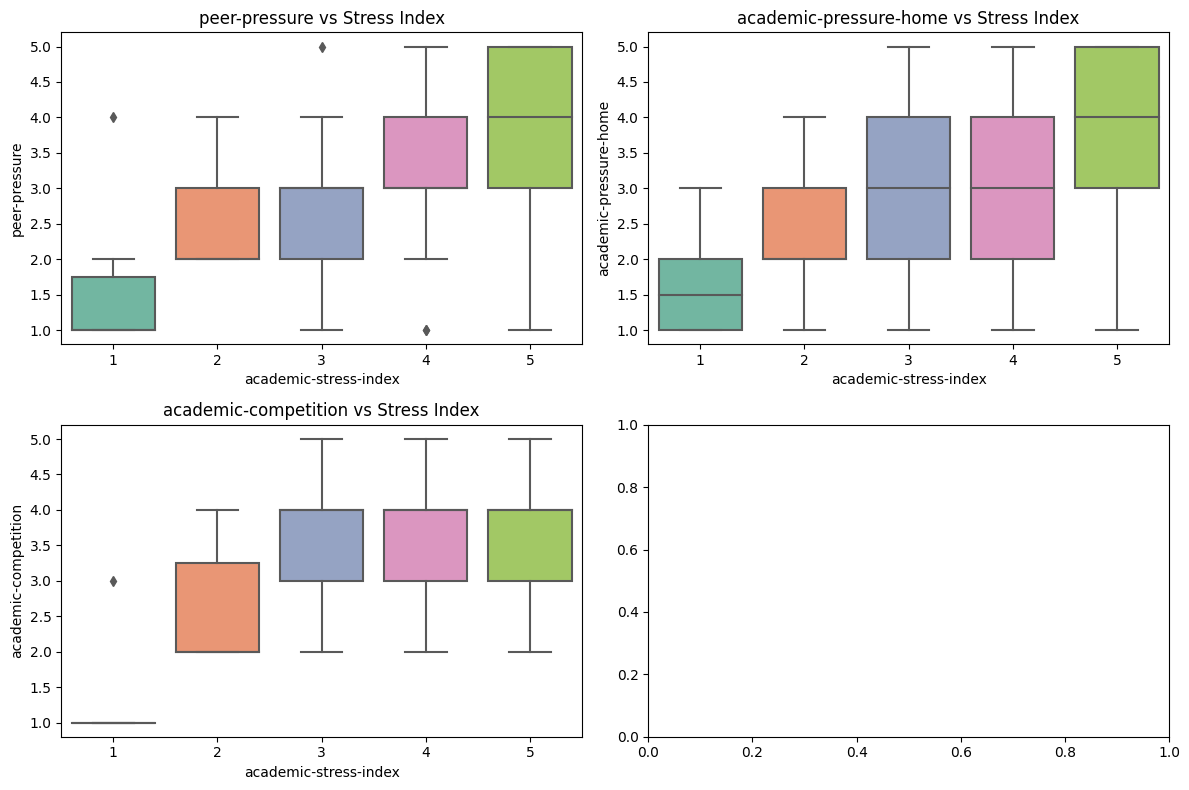

In [12]:
# -----------------
# 3. Boxplots (Numeric Features vs Target)
# -----------------
rows = (len(numeric_cols)-1 + 1) // 2  # exclude target itself from plotting
fig, axes = plt.subplots(rows, 2, figsize=(12, 4*rows))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols[:-1]):
    sns.boxplot(x='academic-stress-index', y=col, data=df, ax=ax, palette="Set2")
    ax.set_title(f"{col} vs Stress Index")
plt.tight_layout()
plt.show()

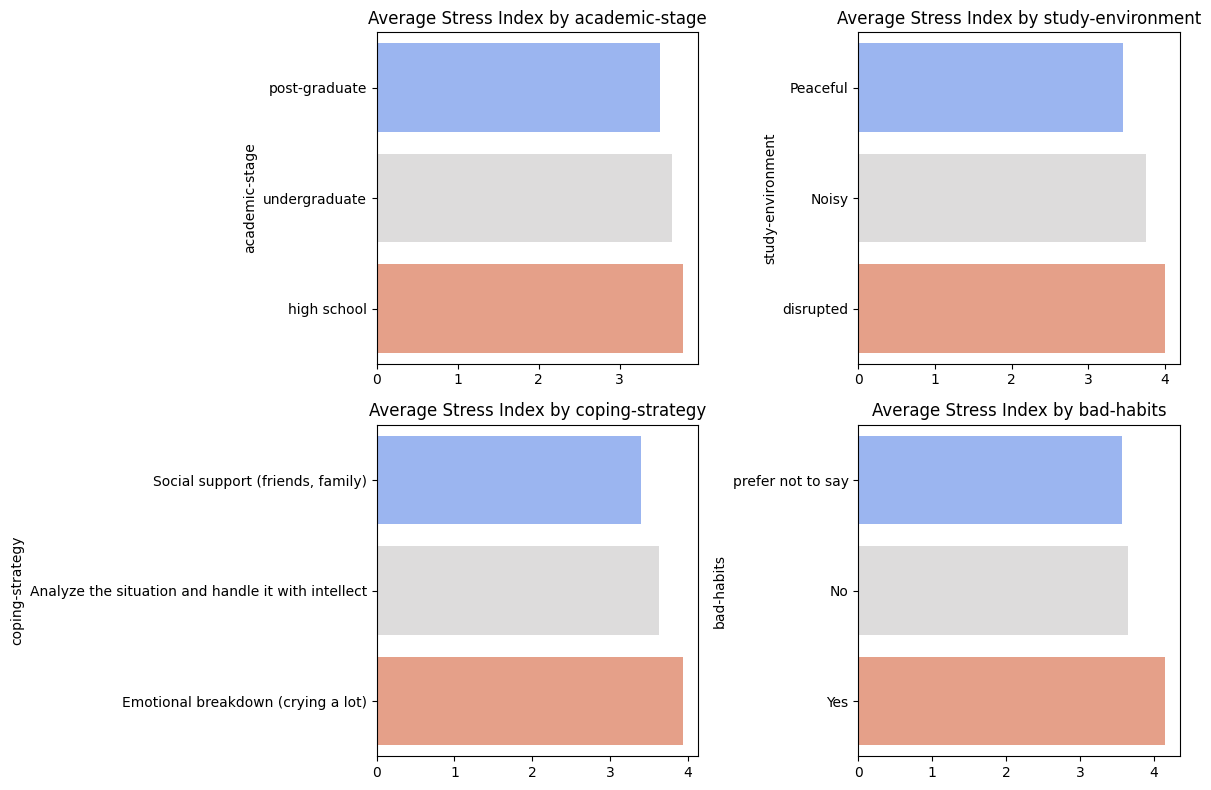

In [13]:
# -----------------
# 4. Average Stress by Categorical Features
# -----------------
rows = (len(categorical_cols) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(12, 4*rows))
axes = axes.flatten()
for ax, col in zip(axes, categorical_cols):
    avg_stress = df.groupby(col)['academic-stress-index'].mean().sort_values()
    sns.barplot(x=avg_stress.values, y=avg_stress.index, ax=ax, palette="coolwarm")
    ax.set_title(f"Average Stress Index by {col}")
plt.tight_layout()
plt.show()

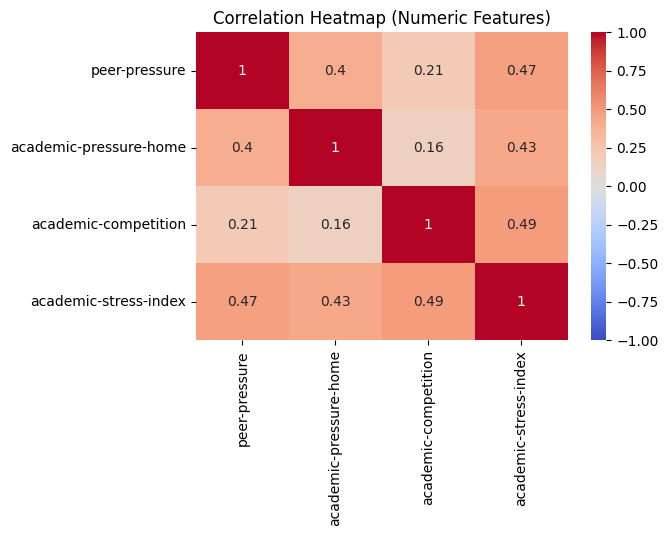

In [14]:
# -----------------
#  Correlation Analysis
# -----------------
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


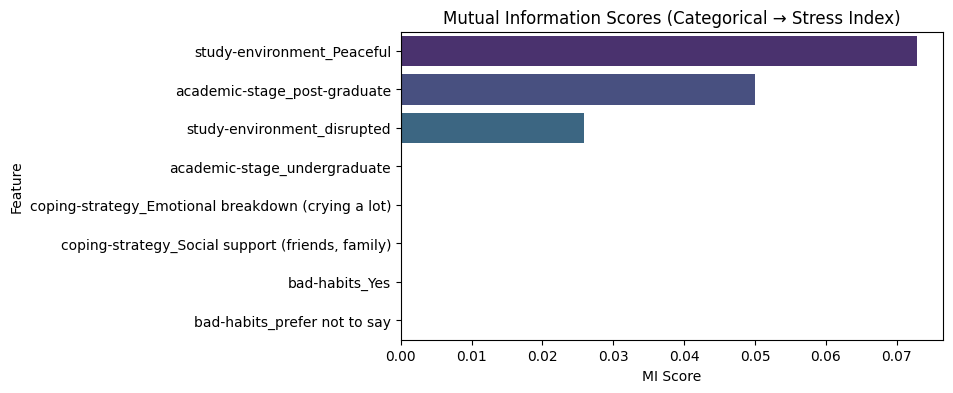

In [15]:
# -----------------
#  Mutual Information for Categorical
# -----------------
X_cat = pd.get_dummies(df[categorical_cols], drop_first=True)
mi_scores = mutual_info_regression(X_cat, df['academic-stress-index'])
mi_df = pd.DataFrame({'Feature': X_cat.columns, 'MI Score': mi_scores}).sort_values('MI Score', ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='viridis')
plt.title("Mutual Information Scores (Categorical → Stress Index)")
plt.show()

* Strongest correlations with stress index:academic-competition (0.49)
peer-pressure (0.47)
academic-pressure-home (0.43)
* These are all moderate positive correlations, meaning:
More competition, higher peer pressure, and family pressure all push stress scores upward.
* The three numeric predictors are not strongly inter-correlated, so each can add unique information to a model.
* The only categorical variable with a notable effect is:
coping-strategy_Emotional breakdown (crying a lot) — small but largest MI score.
* Other categorical features (study environment, stage, bad habits) have close-to-zero MI scores.
* This suggests:
The numeric pressures are much stronger predictors than survey categories. But coping strategy, specifically emotional breakdown, has some unique predictive power.
* Most students:Are undergraduates.
Report a peaceful study environment (though disrupted/noisy also present).
Use the coping strategy “Analyze the situation and handle it with intellect”.
Do not have daily bad habits like smoking/drinking.
* This means the dataset is imbalanced in categorical features — some categories (e.g., postgraduate) are underrepresented.
* Clear upward trend:
Higher stress index levels → higher peer pressure, home academic pressure, and competition ratings.Relationship shape suggests the target behaves ordinally (monotonic trends), not randomly scattered.
Minimal overlap in medians means these features have decent separation power for prediction.
* Study Environment: Disrupted > Noisy > Peaceful in stress averages.
* Coping Strategy:Emotional breakdown leads to highest stress.Social support → lowest stress.


# ML models

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

# Features & Target
X = df.drop(columns=['academic-stress-index'])
y = df['academic-stress-index']

# Identify column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [17]:
# Features & Target
X = df.drop(columns=['academic-stress-index'])
y = df['academic-stress-index']

In [18]:
# List of models
models = {
    "LightGBM": LGBMRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42)
}

In [19]:
# Evaluate models
results = []
for name, model in models.items():
    from sklearn.pipeline import Pipeline

    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Rounding to match ordinal nature
    y_pred_rounded = np.clip(np.round(y_pred), 1, 5)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    from sklearn.metrics import cohen_kappa_score
    qwk = cohen_kappa_score(y_test, y_pred_rounded, weights='quadratic')

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "QWK": qwk
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="QWK", ascending=False)
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 96, number of used features: 10
[LightGBM] [Info] Start training from score 3.666667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

# hyper parameter tunning

In [20]:
# Required imports
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
X = df.drop(columns=['academic-stress-index'])
y = df['academic-stress-index']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# QWK scorer (wrap predictions to nearest integer 1-5)
def qwk_metric(y_true, y_pred):
    y_pred_rounded = np.clip(np.round(y_pred), 1, 5)
    return cohen_kappa_score(y_true, y_pred_rounded, weights='quadratic')

qwk_scorer = make_scorer(qwk_metric, greater_is_better=True)

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols),
    ('num', 'passthrough', num_cols)
])

# Hyperparameter spaces
rf_params = {
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

cb_params = {
    "iterations": [100, 200, 300, 500],
    "depth": [3, 4, 5, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "l2_leaf_reg": [1, 3, 5, 7, 9]
}

# Use fewer iterations for RandomizedSearch due to small dataset
n_iter_search = 20
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomForest search
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

rf_search = RandomizedSearchCV(
    rf_pipe,
    param_distributions={"model__" + k: v for k, v in rf_params.items()},
    n_iter=n_iter_search,
    scoring=qwk_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train)
print("Best RF Params:", rf_search.best_params_)
print("Best RF CV QWK:", rf_search.best_score_)

# CatBoost search
cb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', CatBoostRegressor(verbose=0, random_state=42))
])

cb_search = RandomizedSearchCV(
    cb_pipe,
    param_distributions={"model__" + k: v for k, v in cb_params.items()},
    n_iter=n_iter_search,
    scoring=qwk_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

cb_search.fit(X_train, y_train)
print("Best CB Params:", cb_search.best_params_)
print("Best CB CV QWK:", cb_search.best_score_)

# Evaluate best models on test set
best_rf = rf_search.best_estimator_
best_cb = cb_search.best_estimator_

for name, model in [("RandomForest", best_rf), ("CatBoost", best_cb)]:
    y_pred = model.predict(X_test)
    y_pred_rounded = np.clip(np.round(y_pred), 1, 5)
    qwk_test = cohen_kappa_score(y_test, y_pred_rounded, weights='quadratic')
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Test MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, QWK: {qwk_test:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Best RF Params: {'model__n_estimators': 50, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': None}
Best RF CV QWK: 0.51864082150682
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Best CB Params: {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 7, 'model__iterations': 100, 'model__depth': 4}
Best CB CV QWK: 0.44056141412009586
RandomForest Test MAE: 0.7289, RMSE: 0.9549, R2: 0.1693, QWK: 0.5192
CatBoost Test MAE: 0.7222, RMSE: 0.9061, R2: 0.2520, QWK: 0.4949


### Cross-Validation QWK (Best Parameter Search)
| Model       | Best CV QWK |
|-------------|-------------|
| CatBoost    | 0.4406      |

### Test Set Performance (Tuned Models)
| Model       | MAE    | RMSE   | R²     | QWK    |
|-------------|--------|--------|--------|--------|
| RandomForest| 0.7289 | 0.9549 | 0.1693 | 0.5192 |
| CatBoost    | 0.7222 | 0.9061 | 0.2520 | 0.4949 |


# thanks please upvote